## Chapter29: Customizing Plot Legends

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

Source: [**Python Data Science Handbook** by **VanderPlas**](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [17]:
import numpy as np
import pandas as pd
print("numpy version :",np.__version__)
print("pandas version :",pd.__version__)

numpy version : 1.26.4
pandas version : 2.2.1


In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print("matplotlib version :",mpl.__version__)

matplotlib version : 3.8.4


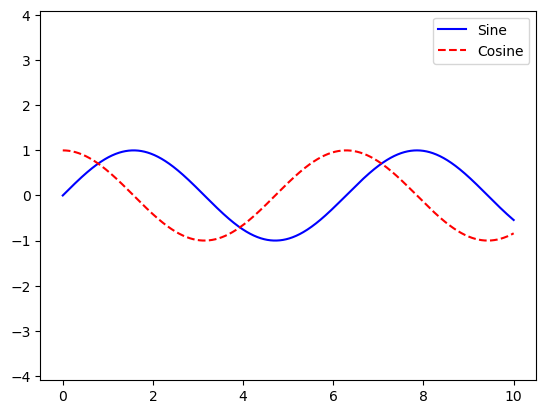

In [73]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

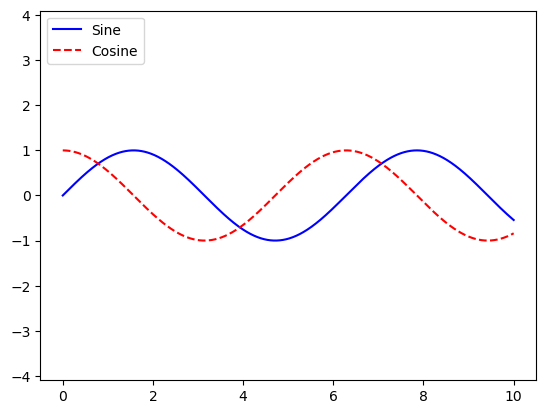

In [85]:
ax.legend(loc='upper left', frameon=True)
fig

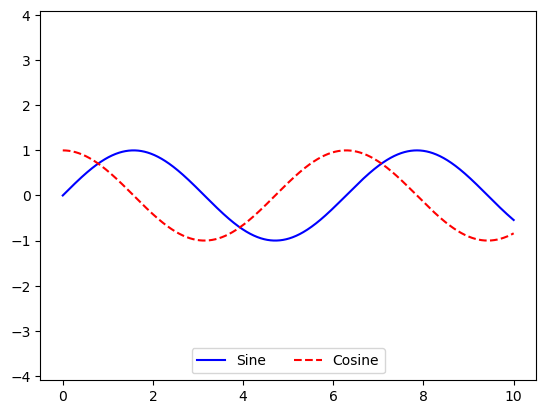

In [93]:
ax.legend(loc=8, ncol=2)
fig

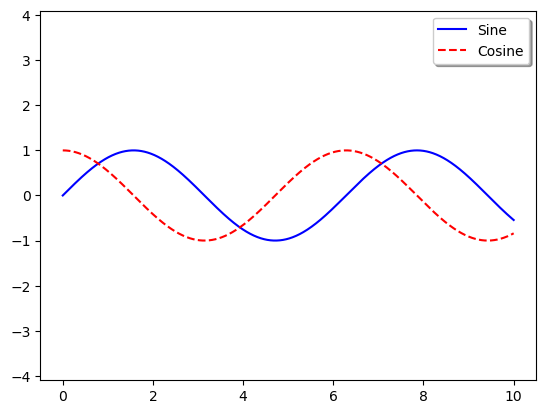

In [129]:
ax.legend(frameon =True, fancybox=True, framealpha=1,
         shadow=True, borderpad=.4)
fig

### Choosing elements for the legend

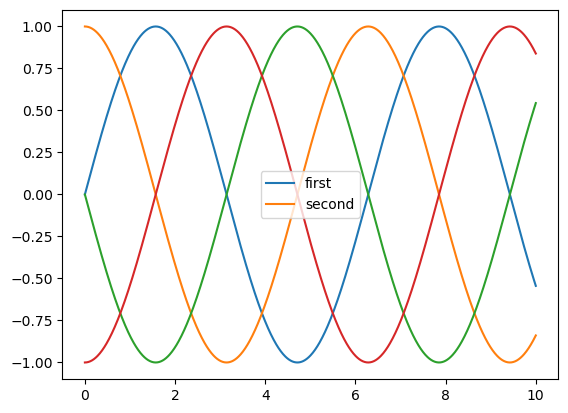

In [157]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second'], frameon=True)

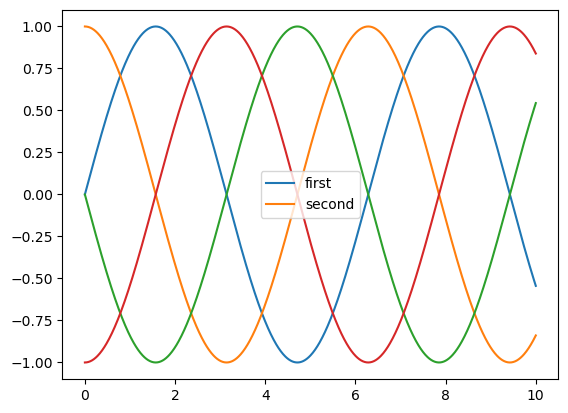

In [180]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(frameon=True)

### Legend for size of points

In [182]:
cities = pd.read_csv('data/california_cities.csv')

In [228]:
# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

In [230]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


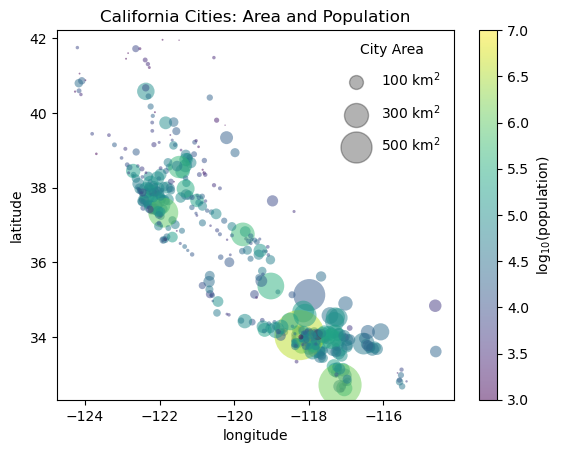

In [236]:
# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
c=np.log10(population), cmap='viridis',
s=area, linewidth=0, alpha=0.5)

plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# create a legend: by ploting empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population');


### Multiple legends 

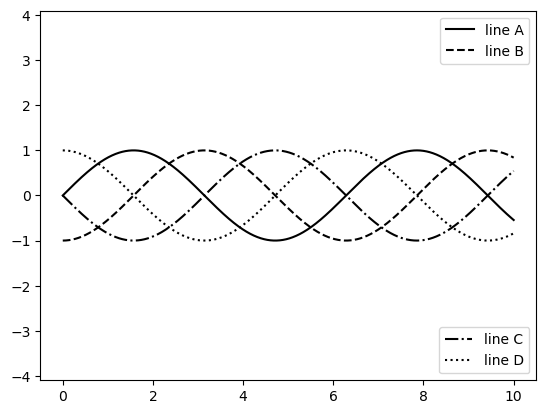

In [247]:
fig, ax = plt.subplots()
lines = []
styles = ['-','--','-.',':']
x = np.linspace(0,10,1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# Specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right')

# Create the second legend and add the artist manually
from matplotlib.legend import Legend

leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right')
ax.add_artist(leg);